In [255]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os.path as path
from scipy.constants import pi, e, hbar, m_e, epsilon_0

In [256]:
filepath = '/home/kristor/Work/Vacuum-MD/data/Checkerboard/100nm_X_100nm/4.65-25--4.70-75/out/'
filename_ramo = path.join(filepath, 'ramo_current.dt') # Ramo current
data = np.loadtxt(filename_ramo)
#cur_time, step, ramo_cur, V_d, nrPart, nrElec, nrHole, ((ramo_current_emit(j,i)/cur_scale, j=1, MAX_SECTIONS), i = 1, nrEmit)
cur_time = data[:, 0]
step = data[:, 1]
ramo_cur = data[:, 2]
#V_d = data[:, 3]
nrPart = data[:, 4]
#nrElec = data[:, 5]
#nrHole = data[:, 6]
ramo_cur_sec_1 = data[:, 7]
ramo_cur_sec_2 = data[:, 8]
ramo_cur_sec_3 = data[:, 9]
ramo_cur_sec_4 = data[:, 10]
ramo_cur_sec_5 = data[:, 11]
ramo_cur_sec_6 = data[:, 12]
ramo_cur_sec_7 = data[:, 13]
ramo_cur_sec_8 = data[:, 14]
ramo_cur_sec_9 = data[:, 15]
ramo_cur_sec_10 = data[:, 16]
ramo_cur_sec_11 = data[:, 17]
ramo_cur_sec_12 = data[:, 18]
ramo_cur_sec_13 = data[:, 19]
ramo_cur_sec_14 = data[:, 20]
ramo_cur_sec_15 = data[:, 21]
ramo_cur_sec_16 = data[:, 22]

x_min = np.min(cur_time)
x_max = np.max(cur_time)

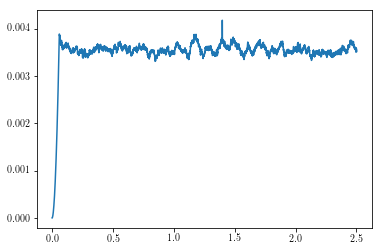

In [257]:
plt.plot(cur_time, ramo_cur)

In [258]:
center_sec = ramo_cur_sec_6 + ramo_cur_sec_7 + ramo_cur_sec_10 + ramo_cur_sec_11
outside_sec = ramo_cur_sec_1 + ramo_cur_sec_2 + ramo_cur_sec_3 + ramo_cur_sec_4 \
            + ramo_cur_sec_5 + ramo_cur_sec_8 + ramo_cur_sec_9 + ramo_cur_sec_12 \
            + ramo_cur_sec_13 + ramo_cur_sec_14 + ramo_cur_sec_15 + ramo_cur_sec_16

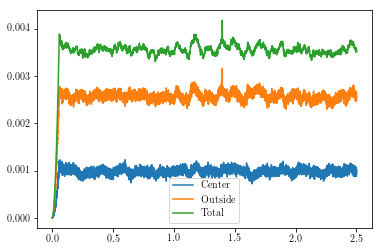

In [259]:
plt.plot(cur_time, center_sec, \
         cur_time, outside_sec, \
         cur_time, ramo_cur)
plt.legend(['Center', 'Outside', 'Total'])

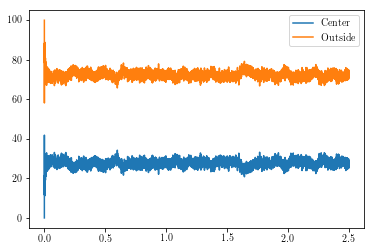

In [260]:
center_per = center_sec/ramo_cur
outside_per = outside_sec/ramo_cur
plt.plot(cur_time, center_per*100, \
         cur_time, outside_per*100)
plt.legend(['Center', 'Outside'])

In [261]:
center_mean = np.mean(center_per)
outside_mean = np.mean(outside_per)
print(center_mean*100)
print(outside_mean*100)
print((center_mean + outside_mean)*100)

27.6541146375079
72.34609217872617
100.00020681623407


In [262]:
a_FN = e**2/(16.0*pi**2*hbar) # A eV V^{-2}
b_FN = -4.0/(3.0*hbar) * np.sqrt(2.0*m_e*e) # eV^{-3/2} V m^{-1}
l_const = e / (4.0*pi*epsilon_0) # eV^{2} V^{-1} m

In [263]:
w_theta = 4.65 # work function in eV
time_step = 0.25E-15 # Time step in sec

V = 20.0E3 # Voltage
d = 2500.0E-9 # Gap spacing
L = 100.0E-9 #Side length of emitter

F = V/d # Electric Field
#A = L**2 # Area of emitter

In [264]:
def t_y(F, w_theta_xy):
    l = l_const * (+1.0*F) / w_theta_xy**2 # l = y^2, y = 3.79E-4 * sqrt(F_old) / w_theta
    t_y = 1.0 + l*( 1.0/9.0 - 1.0/18.0*np.log(l) )
    return t_y

def v_y(F, w_theta_xy):
    l = l_const * (+1.0*F) / w_theta_xy**2 # l = y^2, y = 3.79E-4 * sqrt(F_old) / w_theta
    v_y = 1.0 - l + 1.0/6.0 * l * np.log(l)
    return v_y

def FN_current(A_in, w_theta_xy, F):
    J = a_FN/(w_theta_xy*t_y(F, w_theta_xy)**2)*F**2 * np.exp(v_y(F, w_theta_xy)*b_FN*w_theta_xy**(3/2)/F)
    I = A_in*J
    return I

In [265]:
A_0 = 25.0E-9*25.0E-9
I_cen = FN_current(4*A_0, 4.65, F)
I_out = FN_current(12*A_0, 4.70, F)
I_tot = I_cen + I_out
print(I_cen)
print(I_out)
print(I_tot)

0.0013490933153878734
0.0034559137678192094
0.004805007083207083


In [266]:
I_cen_per = I_cen/I_tot
I_out_per = I_out/I_tot
print(I_cen_per*100.0)
print(I_out_per*100.0)

28.076822614950785
71.92317738504921


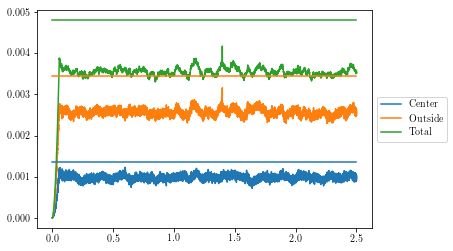

In [267]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(cur_time, center_sec, label='Center', color='#1f77b4')
ax.plot(cur_time, outside_sec, label='Outside', color='#ff7f0e')
ax.plot(cur_time, ramo_cur, label='Total', color='#2ca02c')
ax.plot([x_min, x_max], [I_cen, I_cen], color='#1f77b4')
ax.plot([x_min, x_max], [I_out, I_out], color='#ff7f0e')
ax.plot([x_min, x_max], [I_tot, I_tot], color='#2ca02c')
plt.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))

Text(0, 0.5, '$I/I_{tot}$')

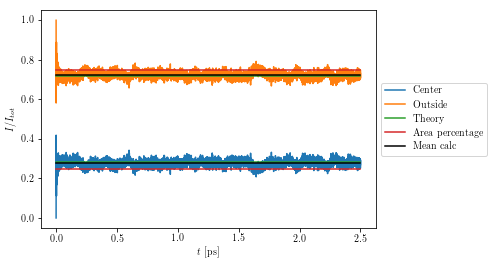

In [268]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(cur_time, center_per, label='Center', color='#1f77b4')
ax.plot(cur_time, outside_per, label='Outside', color='#ff7f0e')
ax.plot([x_min, x_max], [I_cen_per, I_cen_per], color='#2ca02c')
ax.plot([x_min, x_max], [I_out_per, I_out_per], color='#2ca02c', label='Theory')
ax.plot([x_min, x_max], [0.25, 0.25], color='#d62728')
ax.plot([x_min, x_max], [0.75, 0.75], color='#d62728', label='Area percentage')
ax.plot([x_min, x_max], [center_mean, center_mean], color='black')
ax.plot([x_min, x_max], [outside_mean, outside_mean], color='black', label='Mean calc')
plt.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))
plt.xlabel(r'$t$ [ps]')
plt.ylabel(r'$I/I_{tot}$')

In [282]:
filepath = '/home/kristor/Work/Vacuum-MD/data/Checkerboard/50nm_X_50nm/4.65-100/out/'
filename_ramo = path.join(filepath, 'ramo_current.dt') # Ramo current
data = np.loadtxt(filename_ramo)
#cur_time, step, ramo_cur, V_d, nrPart, nrElec, nrHole, ((ramo_current_emit(j,i)/cur_scale, j=1, MAX_SECTIONS), i = 1, nrEmit)
cur_time_50 = data[:, 0]
ramo_cur_50 = data[:, 2]

filepath = '/home/kristor/Work/Vacuum-MD/data/Checkerboard/86.60nm_X_86.60nm/4.70-100/out/'
filename_ramo = path.join(filepath, 'ramo_current.dt') # Ramo current
data = np.loadtxt(filename_ramo)
#cur_time, step, ramo_cur, V_d, nrPart, nrElec, nrHole, ((ramo_current_emit(j,i)/cur_scale, j=1, MAX_SECTIONS), i = 1, nrEmit)
cur_time_86 = data[:, 0]
ramo_cur_86 = data[:, 2]

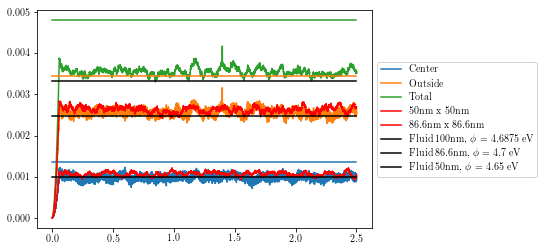

In [293]:
I_fluid_100 = 3.33890157e+11*(100.0E-9)**2
I_fluid_86 = 3.30211120e+11*(86.6025E-9)**2
I_fluid_50 = 3.9934936e+11*(50.0E-9)**2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(cur_time, center_sec, label='Center', color='#1f77b4')
ax.plot(cur_time, outside_sec, label='Outside', color='#ff7f0e')
ax.plot(cur_time, ramo_cur, label='Total', color='#2ca02c')
ax.plot([x_min, x_max], [I_cen, I_cen], color='#1f77b4')
ax.plot([x_min, x_max], [I_out, I_out], color='#ff7f0e')
ax.plot([x_min, x_max], [I_tot, I_tot], color='#2ca02c')
ax.plot(cur_time_50, ramo_cur_50, label='50nm x 50nm', color='red')
ax.plot(cur_time_86, ramo_cur_86, label='86.6nm x 86.6nm', color='red')
ax.plot([x_min, x_max], [I_fluid_100, I_fluid_100], label='Fluid 100nm, $\phi$ = 4.6875 eV', color='black')
ax.plot([x_min, x_max], [I_fluid_86, I_fluid_86], label='Fluid 86.6nm, $\phi$ = 4.7 eV', color='black')
ax.plot([x_min, x_max], [I_fluid_50, I_fluid_50], label='Fluid 50nm, $\phi$ = 4.65 eV', color='black')
plt.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))